In [269]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [2]:
kobe_df = pd.read_csv("data.csv")

Predictor/label: shot_made_flag (this is what you are predicting)

In [3]:
kobe_df.head(10)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10


In [4]:
kobe_df.shape

(30697, 25)

In [5]:
kobe_df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [6]:
kobe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [7]:
# separate the training and testing set from the dataset
train_df = kobe_df[kobe_df["shot_made_flag"].notna()]
test_df = kobe_df[kobe_df["shot_made_flag"].isna()]

train_df.shape, test_df.shape

((25697, 25), (5000, 25))

# EDA

## Action Type/ Shot Type/ Combined Shot Type

In [8]:
# No Missing data in the file
# Classification - made or miss

Text(0.5, 1.0, "Field Goal Miss/Made During Kobe's Career")

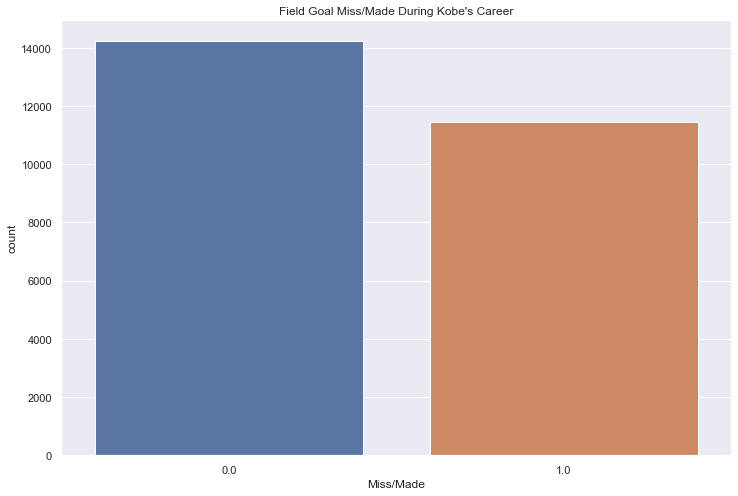

In [23]:
# plot the field goal that Kobe made or miss during his career (plot label)
plt.figure(figsize=(12, 8))
v1 = sns.countplot(x="shot_made_flag", data=train_df)
plt.xlabel("Miss/Made") # set x axis label
plt.title("Field Goal Miss/Made During Kobe's Career") # set title

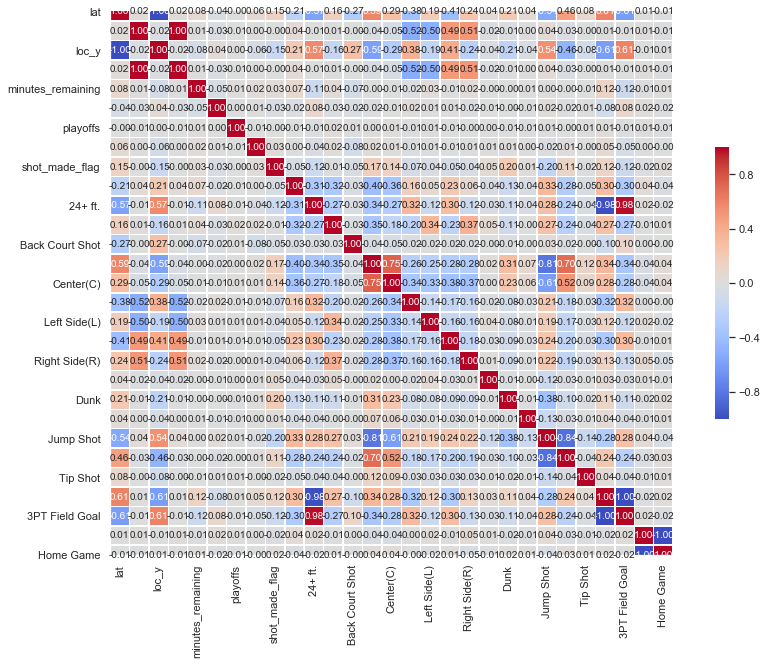

In [182]:
corr = train_df.corr()
g = sns.heatmap(corr,  vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(15,10)
    
plt.show()

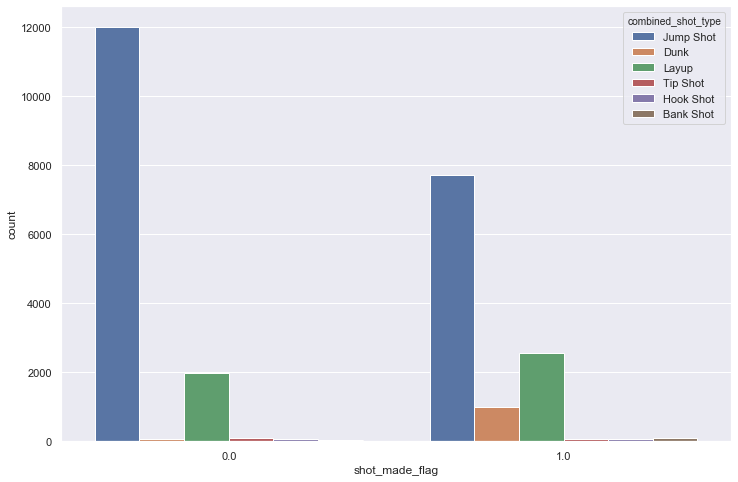

In [24]:
plt.figure(figsize=(12, 8))
v2 = sns.countplot(x="shot_made_flag",hue="combined_shot_type", data=train_df)
# Jumpshot dominated the shot type
# Can consider extract jump shot from the shot type to look at them differently

In [78]:
print("Shot Type under Action Type Column")
print("*************************")
print(train_df["action_type"].unique())
print("\n")
print("Shot Type under Shot Type Column")
print("*************************")
print(train_df["shot_type"].unique())
print("\n")
print("Shot Type under Combined Shot Type Column")
print("*************************")
print(train_df["combined_shot_type"].unique())

Shot Type under Action Type Column
*************************


KeyError: 'action_type'

In [79]:
print(train_df["shot_type"].unique())
print("\n")

['2PT Field Goal' '3PT Field Goal']




If we one-hot econded the action type, we may create too many variables for the dataset. Thus, I will choose to stick with Combined shot type first as they only have 6 variables at the moment.

We will take shot type into consideration as well.

In [80]:
point_stat = train_df.groupby("shot_type")["shot_made_flag"].agg(["mean","count","sum"]).sort_values(ascending=False, by="count").reset_index()
point_stat # dataframe

,shot_type,mean,count,sum
0,2PT Field Goal,0.477348,20285,9683.0
1,3PT Field Goal,0.329268,5412,1782.0


Text(0.5, 1.0, "Percentage of 2-pt and 3-pt Taken during Kobe's career")

<Figure size 1800x1152 with 0 Axes>

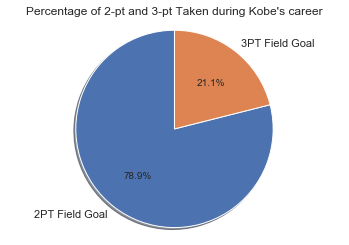

In [102]:
# Create a pie chart to show what the percentage of each shot type he took during his career
plt.figure(figsize=(25,16))
fig1, v8 = plt.subplots()
v8.pie(point_stat["count"], labels=point_stat["shot_type"], autopct='%1.1f%%',
        shadow=True, startangle=90)
v8.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of 2-pt and 3-pt Taken during Kobe's career") # set title

Text(0.5, 1.0, "Percentage of 2-pt and 3-pt Made during Kobe's career")

<Figure size 1800x1152 with 0 Axes>

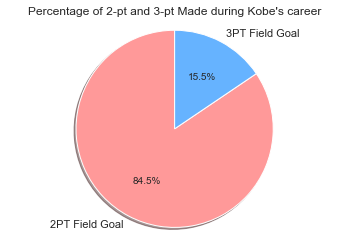

In [108]:
# Create a pie chart to show the percentage of each shot type he made during his career
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'] # add random color

plt.figure(figsize=(25,16))
fig2, v9 = plt.subplots()
v9.pie(point_stat["sum"], labels=point_stat["shot_type"], autopct='%1.1f%%',
       colors=colors, shadow=True, startangle=90)
v9.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of 2-pt and 3-pt Made during Kobe's career") # set title

In [11]:
train_df["combined_shot_type"].value_counts()

Jump Shot    19710
Layup         4532
Dunk          1056
Tip Shot       152
Hook Shot      127
Bank Shot      120
Name: combined_shot_type, dtype: int64

In [25]:
jump_shot_train = train_df.loc[train_df["combined_shot_type"] == "Jump Shot"]
n_jump_shot_train = train_df.loc[train_df["combined_shot_type"] != "Jump Shot"]

Text(0.5, 1.0, "Jump Shot Missed/Made During Kobe's Career")

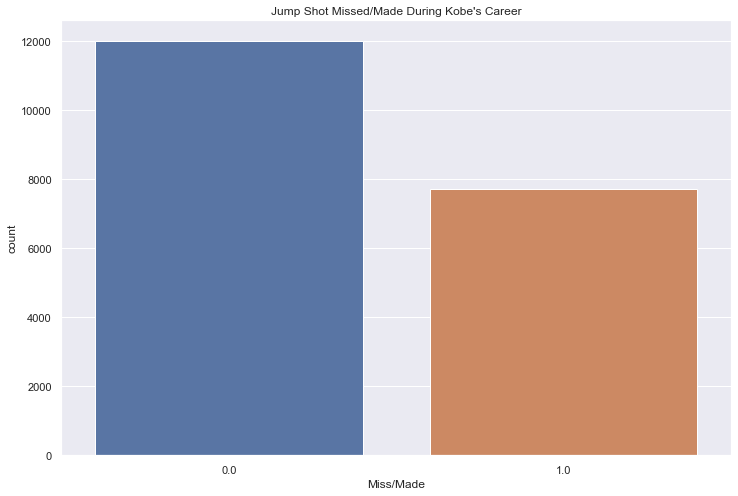

In [27]:
plt.figure(figsize=(12, 8))
v3 = sns.countplot(x="shot_made_flag", data=jump_shot_train)
plt.xlabel("Miss/Made") # set x axis label
plt.title("Jump Shot Missed/Made During Kobe's Career") # set title

Text(0.5, 1.0, "Non-Jump Shot Miss/Made During Kobe's Career")

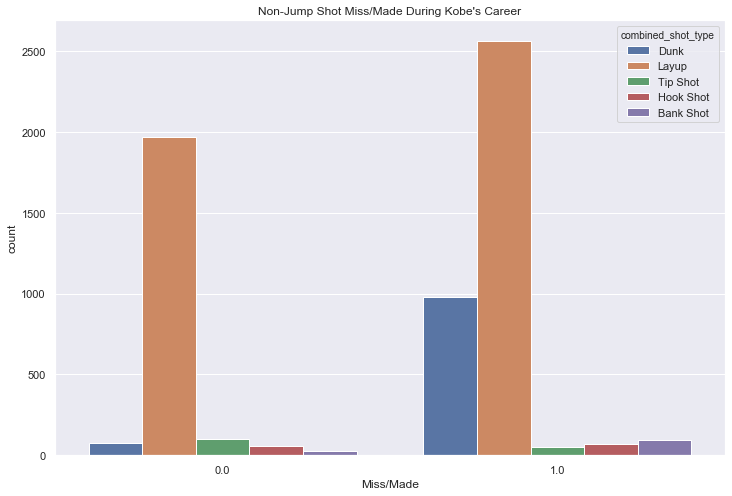

In [28]:
plt.figure(figsize=(12, 8))
v4 = sns.countplot(x="shot_made_flag",hue="combined_shot_type", data = n_jump_shot_train)
plt.xlabel("Miss/Made") # set x axis label
plt.title("Non-Jump Shot Miss/Made During Kobe's Career") # set title

Kobe missed roughly 60% of his jumpshots, while making the rest of the 40%. However, he made siginficantly more dunk/layup (which makes sense as these are shots that are closer to the baskets)

In [29]:
# Mean is the shooting percentage
# Count is the number of shot that Kobe took during his career
# Sum is the number of shot that Kobe made

shot_stat = train_df.groupby("combined_shot_type")["shot_made_flag"].agg(["mean","count","sum"]).sort_values(ascending=False, by="count").reset_index()
shot_stat # dataframe

,combined_shot_type,mean,count,sum
0,Jump Shot,0.391071,19710,7708.0
1,Layup,0.565093,4532,2561.0
2,Dunk,0.928030,1056,980.0
3,Tip Shot,0.348684,152,53.0
4,Hook Shot,0.535433,127,68.0
5,Bank Shot,0.791667,120,95.0


In [31]:
# Rename the Shot stat columns for easier understanding
shot_stat = shot_stat.rename(columns = {"mean": "Shooting Percentage", "count" : "Shot Taken", "sum": "Shot Made"})
shot_stat

,combined_shot_type,Shooting Percentage,Shot Taken,Shot Made
0,Jump Shot,0.391071,19710,7708.0
1,Layup,0.565093,4532,2561.0
2,Dunk,0.928030,1056,980.0
3,Tip Shot,0.348684,152,53.0
4,Hook Shot,0.535433,127,68.0
5,Bank Shot,0.791667,120,95.0


([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

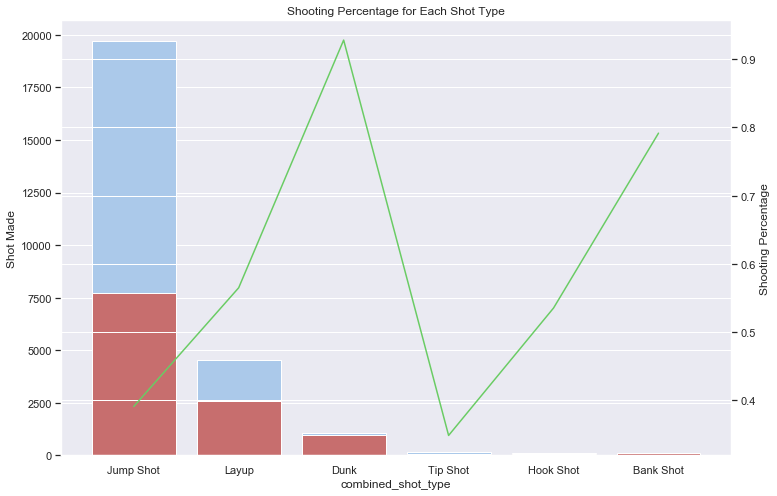

In [188]:
# place the graph of shot taken and shot made together
plt.figure(figsize=(12, 8))
plt.title("Shooting Percentage for Each Shot Type")

sns.set_color_codes("pastel")
v5 = sns.barplot(x="combined_shot_type", y="Shot Taken", data=shot_stat, order=shot_stat["combined_shot_type"], color="b")

sns.set_color_codes("muted")
v6 = sns.barplot(x="combined_shot_type", y="Shot Made", data=shot_stat, order=shot_stat["combined_shot_type"], color="r")

v7 = v6.twinx() # set a different y-axix by using twinx()
v7 = sns.lineplot(x="combined_shot_type", y="Shooting Percentage", data=shot_stat, sort=False, color="g")

plt.xticks(rotation=90)

Not sure if line graph to shows the percentage is the best choice.
But, it seems like tip shot and jump shot had relatively lower shooting percentage, when dunk shot and bank shot's percentage are quite high.

In [70]:
# One-hot encoding combined_shot_type
tr_cshot = pd.get_dummies(train_df["combined_shot_type"])
te_cshot = pd.get_dummies(test_df["combined_shot_type"])

In [71]:
# joined the column to the training and testing dateset and then subsequently dropped it.
train_df = train_df.join(tr_cshot).drop(columns = ["combined_shot_type", "action_type"])
test_df = test_df.join(te_cshot).drop(columns = ["combined_shot_type", "action_type"])

In [110]:
# One-hot encoding shot_type
tr_shot = pd.get_dummies(train_df["shot_type"])
te_shot = pd.get_dummies(test_df["shot_type"])

In [111]:
# joined the column to the training and testing dateset and then subsequently dropped it.
train_df = train_df.join(tr_shot).drop(columns = ["shot_type"])
test_df = test_df.join(te_shot).drop(columns = ["shot_type"])

In [113]:
train_df.columns

Index(['game_event_id', 'game_id', 'lat', 'loc_x', 'loc_y', 'lon',
       'minutes_remaining', 'period', 'playoffs', 'season',
       'seconds_remaining', 'shot_made_flag', 'team_id', 'team_name',
       'game_date', 'matchup', 'opponent', 'shot_id', '16-24 ft.', '24+ ft.',
       '8-16 ft.', 'Back Court Shot', 'Less Than 8 ft.', 'Back Court(BC)',
       'Center(C)', 'Left Side Center(LC)', 'Left Side(L)',
       'Right Side Center(RC)', 'Right Side(R)', 'Bank Shot', 'Dunk',
       'Hook Shot', 'Jump Shot', 'Layup', 'Tip Shot', '2PT Field Goal',
       '3PT Field Goal'],
      dtype='object')

In [121]:
# check whether they are the same
# 3-point line distance from the basket	23.75 ft
# 22 ft in corner[c]

sum(train_df["3PT Field Goal"] != train_df["24+ ft."])

137

In [125]:
train_df[["3PT Field Goal","24+ ft."]].corr()

,3PT Field Goal,24+ ft.
3PT Field Goal,1.00000,0.98394
24+ ft.,0.98394,1.00000


Although all 24+ ft are 3-pt, 3-pt can also be between 16-24 ft. We will need to keep both columns first although they maybe quite closely correlated to each other

## Shot Distance/ Shot Zone Range/ Shot Zone Basic/ Shot Zone Area

In [19]:
# group by the shot number by shot range zone
distance_stat = train_df.groupby("shot_distance")["shot_made_flag"].agg(["mean","count","sum"]).sort_values(ascending=False, by="mean").reset_index()
distance_stat # dataframe

,shot_distance,mean,count,sum
0,1,0.660920,522,345.0
1,0,0.634766,4608,2925.0
2,2,0.532091,483,257.0
3,8,0.477113,568,271.0
4,4,0.473186,317,150.0
...,...,...,...,...
69,50,0.000000,3,0.0
70,51,0.000000,2,0.0
71,52,0.000000,2,0.0
72,53,0.000000,1,0.0


In [18]:
# group by the shot number by shot range zone
zone_stat = train_df.groupby("shot_zone_range")["shot_made_flag"].agg(["mean","count","sum"]).sort_values(ascending=False, by="mean").reset_index()
zone_stat # dataframe

,shot_zone_range,mean,count,sum
0,Less Than 8 ft.,0.573120,7857,4503.0
1,8-16 ft.,0.435484,5580,2430.0
2,16-24 ft.,0.401766,6907,2775.0
3,24+ ft.,0.332513,5281,1756.0
4,Back Court Shot,0.013889,72,1.0


In [50]:
# group by the shot number by shot range basic
bzone_stat = train_df.groupby("shot_zone_basic")["shot_made_flag"].agg(["mean","count","sum"]).sort_values(ascending=False, by="mean").reset_index()
bzone_stat # dataframe

,shot_zone_basic,mean,count,sum
0,Restricted Area,0.618004,5932,3666.0
1,In The Paint (Non-RA),0.454381,3880,1763.0
2,Mid-Range,0.406286,10532,4279.0
3,Left Corner 3,0.370833,240,89.0
4,Right Corner 3,0.339339,333,113.0
5,Above the Break 3,0.329237,4720,1554.0
6,Backcourt,0.016667,60,1.0


In [51]:
# group by the shot number by shot range area
azone_stat = train_df.groupby("shot_zone_area")["shot_made_flag"].agg(["mean","count","sum"]).sort_values(ascending=False, by="mean").reset_index()
azone_stat # dataframe

,shot_zone_area,mean,count,sum
0,Center(C),0.525556,11289,5933.0
1,Right Side(R),0.401658,3859,1550.0
2,Left Side(L),0.396871,3132,1243.0
3,Right Side Center(RC),0.382567,3981,1523.0
4,Left Side Center(LC),0.361177,3364,1215.0
5,Back Court(BC),0.013889,72,1.0


Interestingly, the count for Backcourt Shot was different for shot_zone_basic (shot_zone_range and shot_zone_area have the same number of back court shot).

For the first attempt, maybe we can pair the shot_zone_area and shot_zone range, while temportaily ignored shot_zone_basic and shot_distance.

In [52]:
# One-hot encoding shot_zone_area and shot_zone_range and then drop the columns
tr_range = pd.get_dummies(train_df["shot_zone_range"])
te_range = pd.get_dummies(test_df["shot_zone_range"])

tr_area = pd.get_dummies(train_df["shot_zone_area"])
te_area = pd.get_dummies(test_df["shot_zone_area"])

In [54]:
# joined the column to the training and testing dateset and then subsequently dropped them.
train_df = train_df.join([tr_range, tr_area]).drop(columns = ["shot_zone_range", "shot_zone_area"])
test_df = test_df.join([te_range, te_area]).drop(columns = ["shot_zone_range", "shot_zone_area"])

In [75]:
# drop shot_zone_basic and shot_distance first as we will use the other two columns
train_df = train_df.drop(columns = ["shot_zone_basic", "shot_distance"])
test_df = test_df.drop(columns = ["shot_zone_basic", "shot_distance"])

In [129]:
# Check if "Back Court Shot" and "Back Court(BC)" are duplicated columns
# If yes, then drop one of them

sum(train_df["Back Court Shot"] != train_df["Back Court(BC)"])

0

In [130]:
# drop Back Court (BC) column as it is the same as Back Court Shot
train_df = train_df.drop(columns = ["Back Court(BC)"])
test_df = test_df.drop(columns = ["Back Court(BC)"])

## Check what IDs ('game_event_id', 'game_id', "team_id", "shot_id) mean and see if we keep them

In [137]:
print(train_df["game_event_id"].unique())
print("\n")
print(train_df["game_id"].unique())
print("\n")
print(train_df["team_id"].unique())
print("\n")
print(train_df["shot_id"].unique())
print("\n")

[ 12  35  43 155 244 251 265 294 309   4  27  66  80  86 138 255 274 299
 307 332 345 369 400 429 488 499 184 202 212 219 229 233 289 295 300 398
 445 446   7  11 105 132 190 214 232 260 353  28  33  41  73 131 186 201
 215 225 236 306 368 425   2  39  44  70  74  79  82 101 115 192 217 228
 241 253 262 314 322 339 365 370 379 395  19  20 111 130 135 170 174 240
 317 320 340 362 381 426 444 468 493  34  77  93 108 118 129 199 243 303
 352 360 371 416   5  24  31 139 150 200 209 304 323 341 378 437 478 480
 498  18  25 112 158 162 238 246 269 285 297 311 333 350 448 450  17  48
  83 114 153 166 213 224 231 257 276 302 330 334 342 344 440 454  10  26
  51  81  84  87 121 134 271 273 288 331   8  45  60 107 242 252 279 315
 346 356 373 377 418  14  47  52  57 161 218 287 325 343  15  91 223 235
 348 358 367 374 385 410 421  40  50 109 123 151 220 267 272 335  46  54
  61  67  75  96 193 197 259 278 310 372 376 386 401 404 477  55  95 137
 178 206 221 230 245 290 308 336 375 391  78 119 12

In [142]:
# drop All ID columns as they are meaningless
train_df = train_df.drop(columns = ['game_event_id', 'game_id', "team_id", "shot_id"])
test_df = test_df.drop(columns = ['game_event_id', 'game_id', "team_id", "shot_id"])

In [143]:
train_df.columns

Index(['lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period',
       'playoffs', 'season', 'seconds_remaining', 'shot_made_flag',
       'team_name', 'game_date', 'matchup', 'opponent', '16-24 ft.', '24+ ft.',
       '8-16 ft.', 'Back Court Shot', 'Less Than 8 ft.', 'Center(C)',
       'Left Side Center(LC)', 'Left Side(L)', 'Right Side Center(RC)',
       'Right Side(R)', 'Bank Shot', 'Dunk', 'Hook Shot', 'Jump Shot', 'Layup',
       'Tip Shot', '2PT Field Goal', '3PT Field Goal'],
      dtype='object')

## Team Name/ Matchup/ Opponent

In [147]:
train_df["team_name"].unique()
# only show LA Lakers so we can drop it

train_df = train_df.drop(columns = ["team_name"])
test_df = test_df.drop(columns = ["team_name"])

In [151]:
# The valuable information we can try to extract is whether Lakers is playing at home or away
train_df["matchup"].value_counts()

LAL @ SAS      853
LAL vs. SAS    765
LAL @ SAC      751
LAL @ PHX      751
LAL vs. HOU    722
              ... 
LAL @ PHO       29
LAL vs. NOP     21
LAL vs. SAN     20
LAL @ UTH       15
LAL vs. BKN     13
Name: matchup, Length: 74, dtype: int64

In [152]:
def home_away(x):
    if "@" in x:
        return ("Away Game")
    else:
        return ("Home Game")

In [155]:
train_df["matchup"].apply(home_away)

Away Game    13212
Home Game    12485
Name: matchup, dtype: int64

In [156]:
train_df["Home_Away"] = train_df["matchup"].apply(home_away)
test_df["Home_Away"] = test_df["matchup"].apply(home_away)

In [157]:
# let's examine the new column "Home Away"
# group by the shot number by home away
H_A_stat = train_df.groupby("Home_Away")["shot_made_flag"].agg(["mean","count","sum"]).sort_values(ascending=False, by="mean").reset_index()
H_A_stat # dataframe

,Home_Away,mean,count,sum
0,Home Game,0.456468,12485,5699.0
1,Away Game,0.436421,13212,5766.0


Kobe's field goal percentage is slightly better at Home but not by a huge margin. <br>
Kobe took 1,000 more shots away from Staples Centre

In [158]:
# One-hot encoding Home_Away and then drop the columns
tr_HA = pd.get_dummies(train_df["Home_Away"])
te_HA = pd.get_dummies(test_df["Home_Away"])

In [159]:
# joined the column to the training and testing dateset and then subsequently dropped them.
train_df = train_df.join([tr_HA]).drop(columns = ["Home_Away", "matchup"])
test_df = test_df.join([te_HA]).drop(columns = ["Home_Away", "matchup"])

In [160]:
train_df.columns

Index(['lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period',
       'playoffs', 'season', 'seconds_remaining', 'shot_made_flag',
       'game_date', 'opponent', '16-24 ft.', '24+ ft.', '8-16 ft.',
       'Back Court Shot', 'Less Than 8 ft.', 'Center(C)',
       'Left Side Center(LC)', 'Left Side(L)', 'Right Side Center(RC)',
       'Right Side(R)', 'Bank Shot', 'Dunk', 'Hook Shot', 'Jump Shot', 'Layup',
       'Tip Shot', '2PT Field Goal', '3PT Field Goal', 'Away Game',
       'Home Game'],
      dtype='object')

In [179]:
train_df["opponent"].value_counts()

SAS    1638
PHX    1535
HOU    1399
SAC    1397
DEN    1352
POR    1292
UTA    1238
MIN    1219
GSW    1143
LAC    1074
DAL    1033
MEM     871
BOS     783
SEA     694
IND     626
ORL     604
PHI     603
DET     587
NYK     566
OKC     561
TOR     556
MIA     517
CHI     516
CLE     514
MIL     507
WAS     501
CHA     500
NOH     475
ATL     438
NJN     422
NOP     287
VAN     204
BKN      45
Name: opponent, dtype: int64

In [180]:
Opp_stat = train_df.groupby("opponent")["shot_made_flag"].agg(["mean","count","sum"]).sort_values(ascending=False, by="mean").reset_index()
Opp_stat # dataframe

,opponent,mean,count,sum
0,NYK,0.477032,566,270.0
1,VAN,0.470588,204,96.0
2,SAC,0.465283,1397,650.0
3,POR,0.465170,1292,601.0
4,GSW,0.464567,1143,531.0
5,PHX,0.464495,1535,713.0
6,TOR,0.464029,556,258.0
7,LAC,0.460894,1074,495.0
8,DEN,0.457840,1352,619.0
9,DAL,0.454017,1033,469.0


Before I groupby the data, I thought that Kobe may play worse againt certain team (e.g. SAS). However, it seems like the shooting percentage ranges from 40% to 47.7%. <br>
There are certainly some disrepency between teams, but I am hestitant to one-hot encoding all the team into new columns as it will hugely increase the dimension of the dataset 

In [181]:
# drop the opponent column
train_df = train_df.drop(columns = ["opponent"])
test_df = test_df.drop(columns = ["opponent"])

In [184]:
train_df.columns

Index(['lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period',
       'playoffs', 'season', 'seconds_remaining', 'shot_made_flag',
       'game_date', '16-24 ft.', '24+ ft.', '8-16 ft.', 'Back Court Shot',
       'Less Than 8 ft.', 'Center(C)', 'Left Side Center(LC)', 'Left Side(L)',
       'Right Side Center(RC)', 'Right Side(R)', 'Bank Shot', 'Dunk',
       'Hook Shot', 'Jump Shot', 'Layup', 'Tip Shot', '2PT Field Goal',
       '3PT Field Goal', 'Away Game', 'Home Game'],
      dtype='object')

In [186]:
train_df["season"].value_counts()

2005-06    1924
2002-03    1852
2008-09    1851
2007-08    1819
2009-10    1772
2001-02    1708
2006-07    1579
2000-01    1575
2010-11    1521
2011-12    1416
2003-04    1371
2012-13    1328
1999-00    1312
2004-05    1127
2015-16     932
1997-98     810
1998-99     765
2014-15     593
1996-97     383
2013-14      59
Name: season, dtype: int64

In [187]:
season_stat = train_df.groupby("season")["shot_made_flag"].agg(["mean","count","sum"]).sort_values(ascending=False, by="mean").reset_index()
season_stat # dataframe

,season,mean,count,sum
0,2007-08,0.468389,1819,852.0
1,2008-09,0.467855,1851,866.0
2,2000-01,0.466667,1575,735.0
3,1999-00,0.460366,1312,604.0
4,1998-99,0.458824,765,351.0
5,2001-02,0.458431,1708,783.0
6,2006-07,0.457885,1579,723.0
7,2012-13,0.457831,1328,608.0
8,2005-06,0.453742,1924,873.0
9,2009-10,0.453725,1772,804.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

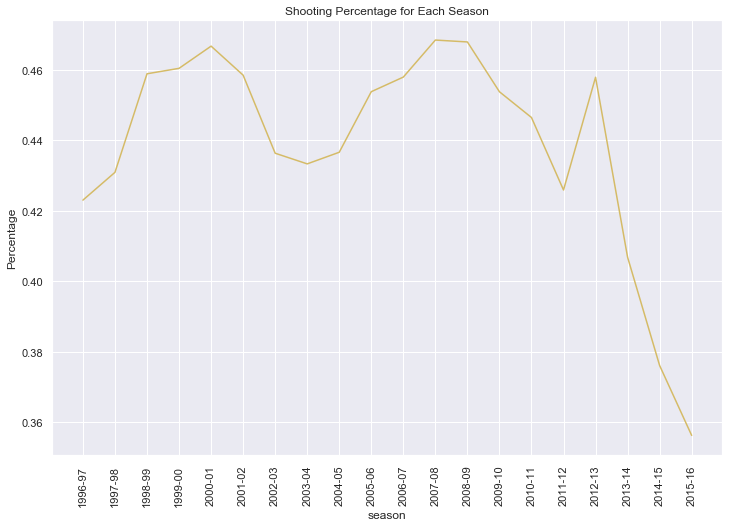

In [191]:
# place the graph of shot taken and shot made together
plt.figure(figsize=(12, 8))
plt.title("Shooting Percentage for Each Season")

v10 = sns.lineplot(x="season", y="mean", data=season_stat, color="y")
plt.ylabel("Percentage")

plt.xticks(rotation=90)

Let's try to interpret the graph with some domain knowledge. 

After Kobe entered the league in 1996, the rising shooting percentage can be understood as his development. It peaked at 2000-2001, which was the first season of the Lakers 3-peat.

Then, the percentage started to decline as opponents were now foucsing on tightly guarding him together with Shaq. It hit the bottom during the season when they lost to the Pistons in the Final.

It slightly rose after the Lakers traded Shaq and let Kobe Led the team. The percentage hit the plateau during 2008-2010 when the Lakers got to the Final for three consecutive years.

It kept dropping due to Age, and hit the lowest during 2011 when they have the major overhaul of the Roster (i.e. addition of Dwight Howard and Steve Nash plus the retirement of Phil Jackson)

After a rebound in 2012-2013, the percentage kept dropping due to Father time and the major Achilles injury in 2013 until his retirement.

In [192]:
# One-hot encoding Season and then drop the columns
tr_Sea = pd.get_dummies(train_df["season"])
te_Sea = pd.get_dummies(test_df["season"])

In [193]:
# joined the column to the training and testing dateset and then subsequently dropped them.
train_df = train_df.join([tr_Sea]).drop(columns = ["season"])
test_df = test_df.join([te_Sea]).drop(columns = ["season"])

## Playoff

In [196]:
train_df["playoffs"].value_counts()

0    21939
1     3758
Name: playoffs, dtype: int64

In [197]:
playoff_stat = train_df.groupby("playoffs")["shot_made_flag"].agg(["mean","count","sum"]).sort_values(ascending=False, by="mean").reset_index()
playoff_stat # dataframe

,playoffs,mean,count,sum
0,0,0.446420,21939,9794.0
1,1,0.444651,3758,1671.0


No need to encode Playoff and also the percentage is similar between playoff and regular season.

In [198]:
train_df.columns

Index(['lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period',
       'playoffs', 'seconds_remaining', 'shot_made_flag', 'game_date',
       '16-24 ft.', '24+ ft.', '8-16 ft.', 'Back Court Shot',
       'Less Than 8 ft.', 'Center(C)', 'Left Side Center(LC)', 'Left Side(L)',
       'Right Side Center(RC)', 'Right Side(R)', 'Bank Shot', 'Dunk',
       'Hook Shot', 'Jump Shot', 'Layup', 'Tip Shot', '2PT Field Goal',
       '3PT Field Goal', 'Away Game', 'Home Game', '1996-97', '1997-98',
       '1998-99', '1999-00', '2000-01', '2001-02', '2002-03', '2003-04',
       '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10',
       '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16'],
      dtype='object')

In [207]:
period_stat = train_df.groupby(["period"])["shot_made_flag"].agg(["mean","count","sum"]).sort_values(ascending=False, by="mean").reset_index()
period_stat # dataframe

,period,mean,count,sum
0,6,0.466667,30,14.0
1,1,0.465672,6700,3120.0
2,3,0.453442,7002,3175.0
3,2,0.448802,5635,2529.0
4,5,0.442857,280,124.0
5,7,0.428571,7,3.0
6,4,0.413702,6043,2500.0


In [215]:
tr_P = pd.get_dummies(train_df["period"])
te_P = pd.get_dummies(test_df["period"])

In [216]:
train_df = train_df.join([tr_P]).drop(columns = ["period"])
test_df = test_df.join([te_P]).drop(columns = ["period"])

In [206]:
min_stat = train_df.groupby("minutes_remaining")["shot_made_flag"].agg(["mean","count","sum"]).sort_values(ascending=False, by="mean").reset_index()
min_stat # dataframe

,minutes_remaining,mean,count,sum
0,7,0.481876,1876,904.0
1,9,0.479744,1876,900.0
2,6,0.469965,1981,931.0
3,5,0.465966,2189,1020.0
4,10,0.454950,1798,818.0
5,4,0.452243,2408,1089.0
6,3,0.451409,2377,1073.0
7,2,0.447247,2379,1064.0
8,1,0.447230,2274,1017.0
9,8,0.434534,1749,760.0


The shot taken within the last minute had a significant lower percentage. <br>
Maybe I can consider using this to create a function to distinguish last minute and non-last minute shot

In [209]:
def last_min(x):
    if x == 0:
        return ("last minute")
    else:
        return ("non-last minute")

In [210]:
train_df["Last_min"] = train_df["minutes_remaining"].apply(last_min)
test_df["Last_min"] = test_df["minutes_remaining"].apply(last_min)

In [211]:
last_min_stat = train_df.groupby("Last_min")["shot_made_flag"].agg(["mean","count","sum"]).sort_values(ascending=False, by="mean").reset_index()
last_min_stat # dataframe

,Last_min,mean,count,sum
0,non-last minute,0.455655,22449,10229.0
1,last minute,0.380542,3248,1236.0


In [212]:
# One-hot encoding last_min and then drop the columns
tr_LM = pd.get_dummies(train_df["Last_min"])
te_LM = pd.get_dummies(test_df["Last_min"])

In [213]:
# joined the column to the training and testing dateset and then subsequently dropped them.
train_df = train_df.join([tr_LM]).drop(columns = ["Last_min", "minutes_remaining"])
test_df = test_df.join([te_LM]).drop(columns = ["Last_min", "minutes_remaining"])

In [219]:
# Drop the rest of the column (e.g. lat, loc_x, loc_y, lon, seconds_remaining, game_date)
train_df = train_df.drop(columns = ["lat", "loc_x", "loc_y", "lon", "seconds_remaining", "game_date"])
test_df = test_df.drop(columns = ["lat", "loc_x", "loc_y", "lon", "seconds_remaining", "game_date"])

In [220]:
train_df.columns

Index([             'playoffs',        'shot_made_flag',
                   '16-24 ft.',               '24+ ft.',
                    '8-16 ft.',       'Back Court Shot',
             'Less Than 8 ft.',             'Center(C)',
        'Left Side Center(LC)',          'Left Side(L)',
       'Right Side Center(RC)',         'Right Side(R)',
                   'Bank Shot',                  'Dunk',
                   'Hook Shot',             'Jump Shot',
                       'Layup',              'Tip Shot',
              '2PT Field Goal',        '3PT Field Goal',
                   'Away Game',             'Home Game',
                     '1996-97',               '1997-98',
                     '1998-99',               '1999-00',
                     '2000-01',               '2001-02',
                     '2002-03',               '2003-04',
                     '2004-05',               '2005-06',
                     '2006-07',               '2007-08',
                     '2008-09',

# Model Training

In [222]:
# Classification problem
# Try with Linear Model first -  Logistic Regression
# Set Y and then drop the column

y = train_df["shot_made_flag"]
train_df = train_df.drop(columns = ["shot_made_flag"])

In [244]:
test_df = test_df.drop(columns = ["shot_made_flag"])

In [258]:
train_df = train_df.drop(columns = [7])

In [246]:
# Transform the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(train_df)
X_test = scaler.transform(test_df)

ValueError: operands could not be broadcast together with shapes (5000,49) (50,) (5000,49) 

In [228]:
# train-test split using stratified K Fold
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X_train, y)
print(skf)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [265]:
# train test split the dataset
trainX, testX, trainy, testy = train_test_split(train_df, y, test_size=0.2, random_state=2)

In [266]:
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

/Users/chunheitam/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [267]:
lr_probs = model.predict_proba(testX)

Logistic: ROC AUC=0.624


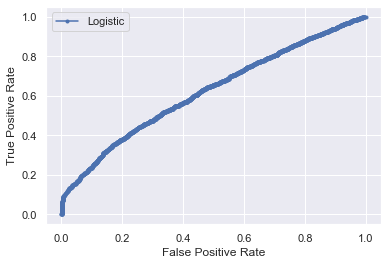

In [272]:
# calculate scores
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [273]:
ans = clf.predict_proba(test_df)
ans

array([[0.5972344 , 0.4027656 ],
       [0.57300459, 0.42699541],
       [0.45621494, 0.54378506],
       ...,
       [0.57450433, 0.42549567],
       [0.52810468, 0.47189532],
       [0.65239929, 0.34760071]])

In [274]:
submit = pd.read_csv('sample_submission.csv')
submit.columns

Index(['shot_id', 'shot_made_flag'], dtype='object')

In [275]:
submit['shot_made_flag'] = ans[:,1]

In [276]:
submit.to_csv('submission1.csv', index = False)